# Section 1: Logistic Regression

The dataset represents data from the Framingham Heart Study, Levy (1999) National Heart Lung and Blood Institute, Center for Bio-Medical Communication. Researchers are interested in studying risk factors for coronary heart disease (CHD).

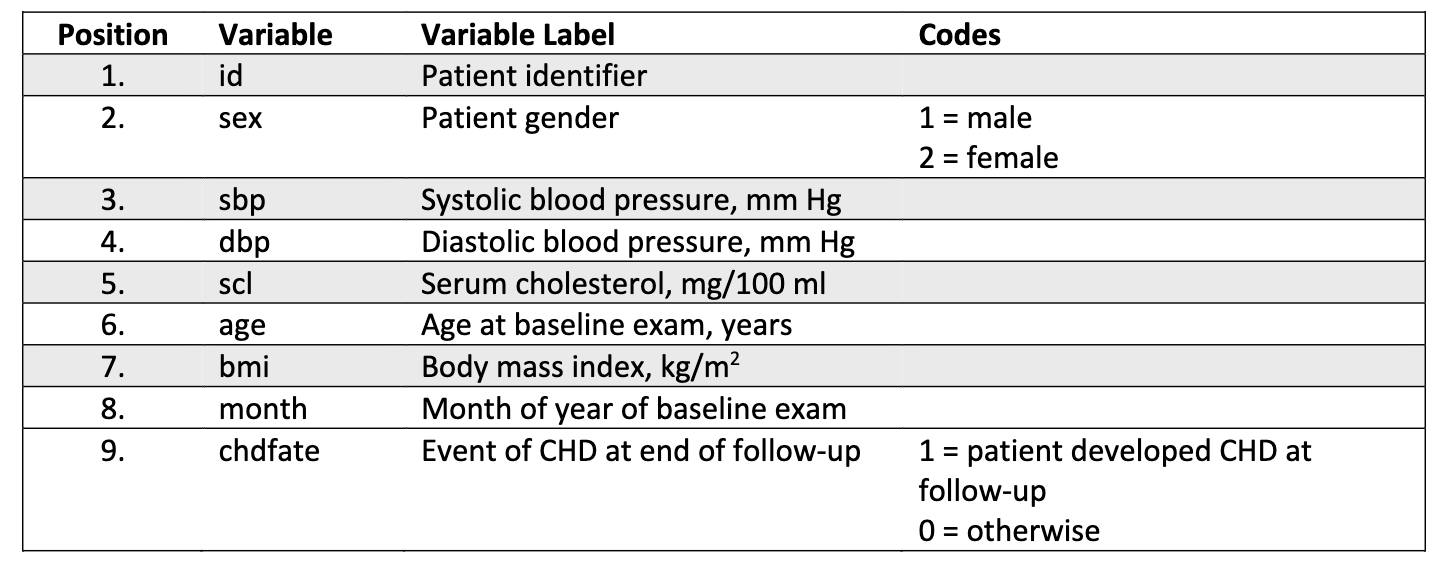

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

**1. Answer the following:**

**a. What is the outcome?**

The outcome is the development of Coronary Heart Disease (CHD), and the results are encoded into binary forms as 1 = positive CHD and 0 = negative CHD.

**b. What are the predictors researchers are interested in?**

Researchers are interested in: Patient gender, Systolic blood pressure, Diastolic blood pressure, Serum cholesterol, Age at baseline exam, Body mass index, Month of the year of baseline exam.

**c. What is the hypothesis?**

The hypothesis is the relationship between the predictors and the likelihood of developing Coronary Heart Disease (CHD).

**2. Import the data, print out a few rows, and compute summary statistics. Is there missing data or
other concerns?**

In [2]:
data = pd.read_excel('framingham_dataset_mod.xlsx')

print(data.head())

     id  sex  sbp  dbp    scl  age   bmi  month  chdfate
0  2642    1  120   80  267.0   55  25.0      8        1
1  4627    1  130   78  192.0   53  28.4     12        1
2  2568    1  144   90  207.0   61  25.1      8        1
3  4192    1   92   66  231.0   48  26.2     11        1
4  3977    1  162   98  271.0   39  28.4     11        1


In [3]:
print(data.describe())

                id          sex          sbp          dbp          scl  \
count  4695.000000  4695.000000  4695.000000  4695.000000  4662.000000   
mean   2350.365282     1.563791   132.776358    82.547391   228.282711   
std    1356.328620     0.495967    22.802159    12.739928    44.559330   
min       1.000000     1.000000    80.000000    40.000000   115.000000   
25%    1175.500000     1.000000   116.000000    74.000000   197.000000   
50%    2351.000000     2.000000   130.000000    80.000000   225.000000   
75%    3524.500000     2.000000   144.000000    90.000000   255.000000   
max    4699.000000     2.000000   270.000000   148.000000   568.000000   

               age          bmi        month      chdfate  
count  4695.000000  4686.000000  4695.000000  4695.000000  
mean     46.037487    25.630837     6.370394     0.313312  
std       8.505511     4.095526     3.683150     0.463889  
min      30.000000    16.200000     1.000000     0.000000  
25%      39.000000    22.800000  

In [4]:
print('missing data:', data.isnull().sum())

missing data: id          0
sex         0
sbp         0
dbp         0
scl        33
age         0
bmi         9
month       0
chdfate     0
dtype: int64


**3. Month of the year at baseline is an unwieldy variable meant to adjust for seasonal effects. Rather than put it in the model as is, create 4 binary variables for each season. This link will give examples of how to do this. The categories should be winter, spring, summer, & fall and should be defined as follows based on the month:**

**a. Winter: 12, 1, 2**

In [5]:
data['winter'] = data['month'].isin([12,1,2]).astype(int)

**b. Spring: 3, 4, 5**

In [6]:
data['spring'] = data['month'].isin([3,4,5]).astype(int)

**c. Summer: 6, 7, 8**

In [7]:
data['summer'] = data['month'].isin([6,7,8]).astype(int)

**d. Fall: 9, 10, 11**

In [8]:
data['fall'] = data['month'].isin([9,10,11]).astype(int)

In [9]:
data.drop('month', axis = 1, inplace = True)
print(data.head())

     id  sex  sbp  dbp    scl  age   bmi  chdfate  winter  spring  summer  \
0  2642    1  120   80  267.0   55  25.0        1       0       0       1   
1  4627    1  130   78  192.0   53  28.4        1       1       0       0   
2  2568    1  144   90  207.0   61  25.1        1       0       0       1   
3  4192    1   92   66  231.0   48  26.2        1       0       0       0   
4  3977    1  162   98  271.0   39  28.4        1       0       0       0   

   fall  
0     0  
1     0  
2     0  
3     1  
4     1  


**4. Fit a logistic regression model using all the relevant predictor variables (Note: use season, not month. Also, ID is not a predictor variable. Do not use it). Use statsmodels for now.**

In [10]:
X = data.drop(['id', 'chdfate'], axis = 1)
y = data['chdfate']

print("Missing or Infinite Values in Predictors:")
print(X.isnull().sum())
print(X.isin([np.inf, -np.inf]).sum())

X.replace([np.inf, -np.inf], np.nan, inplace = True)
X.fillna(X.mean(), inplace = True)

print("After Handling Missing or Infinite Values:")
print(X.isnull().sum().sum())
print(X.isin([np.inf, -np.inf]).sum().sum())

# Fit logistic regression model 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display 
print(result.summary())

Missing or Infinite Values in Predictors:
sex        0
sbp        0
dbp        0
scl       33
age        0
bmi        9
winter     0
spring     0
summer     0
fall       0
dtype: int64
sex       0
sbp       0
dbp       0
scl       0
age       0
bmi       0
winter    0
spring    0
summer    0
fall      0
dtype: int64
After Handling Missing or Infinite Values:
0
0
Optimization terminated successfully.
         Current function value: 0.573358
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                          Logit   Df Residuals:                     4685
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.07779
Time:                        20:46:15   Log-Likelihood:                -2691.9
converged:                       True   LL-Null:           

**5. Conduct model diagnostics. This reference may be helpful.**

**a. Look at distributions of the main predictor variables (excluding the new season variables). Do any require transformation?**

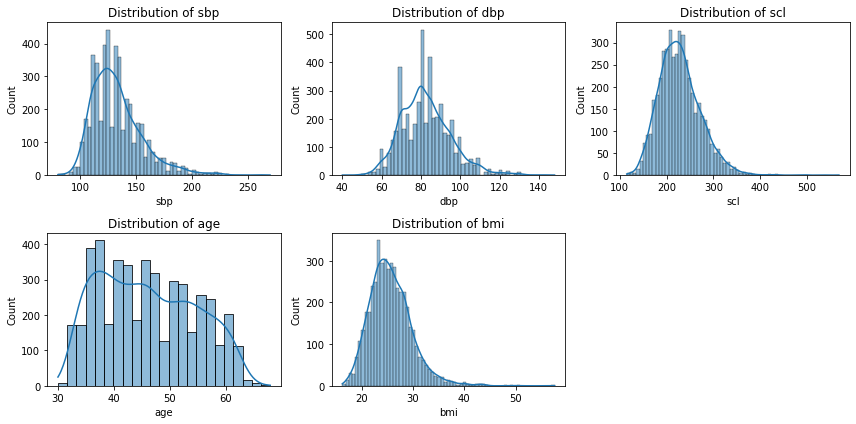

In [11]:
continuous_predictors = ['sbp', 'dbp', 'scl', 'age', 'bmi']

plt.figure(figsize = (12, 6))
for _, predictor in enumerate(continuous_predictors, 1):
    plt.subplot(2, 3, _)
    sns.histplot(data[predictor], kde = True)
    plt.title(f'Distribution of {predictor}')

plt.tight_layout()
plt.show()

The square root simulation can make the distribution more symmetric as the variables are left-skewed.

**b. Check to see if collinearity is present. Explain what you find.**

In [12]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, _) for _ in range(X.shape[1])]

print(vif_data)

  Variable        VIF
0      sex   1.024007
1      sbp   2.971112
2      dbp   2.781936
3      scl   1.110597
4      age   1.267254
5      bmi   1.178242
6   winter  28.605847
7   spring  25.001327
8   summer  15.463980
9     fall  28.305216


**c. Check linearity for each of the continuous covariates. Do those covariates each have a linear relationship with the outcome?**

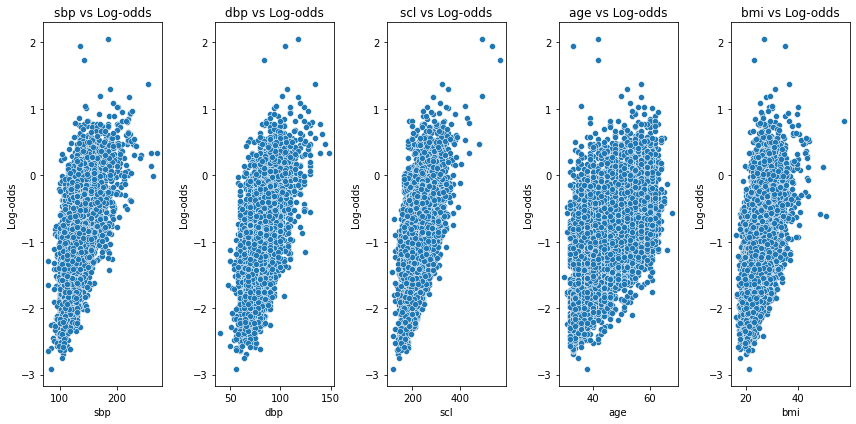

In [13]:
plt.figure(figsize = (12, 6))
for _, predictor in enumerate(continuous_predictors, 1):
    plt.subplot(1, 5, _)
    sns.scatterplot(x=data[predictor], y=result.fittedvalues)
    plt.title(f'{predictor} vs Log-odds')
    plt.xlabel(predictor)
    plt.ylabel('Log-odds')

plt.tight_layout()
plt.show()

Yes, as the scatter plots above show the linear relationship between each continuous predictor variable and the log-odds of the outcome, while the points are closely clustered together.

**d. Are there outliers?**

Yes, as there are some points far away from the cluster, which indicates that there are potential outliers or influential observations.

**e. Are there at least 5 outcomes per category of sex?**

Yes, for both categories there are more than 5 outcomes for each level.

**6. Fix any issues you find and refit the model.**

In [14]:
data['scl'].fillna(data['scl'].mean(), inplace = True)
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

X = data.drop(['id', 'chdfate'], axis = 1)
y = data['chdfate']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit(maxiter = 100)  

print(result.summary())

         Current function value: 0.573358
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                          Logit   Df Residuals:                     4685
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.07779
Time:                        20:46:22   Log-Likelihood:                -2691.9
converged:                      False   LL-Null:                       -2919.0
Covariance Type:            nonrobust   LLR p-value:                 3.690e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7977        nan        nan        nan         nan         nan
sex           -0.8034      0.068    -11.888      0.000      -0.9

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The new refitted model handle missing values successfully.

**7. Compute the ORs and their confidence intervals. Interpret the ORs.**

In [15]:
X = data.drop(['id', 'chdfate'], axis = 1)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.573358
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                          Logit   Df Residuals:                     4685
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.07779
Time:                        20:46:23   Log-Likelihood:                -2691.9
converged:                       True   LL-Null:                       -2919.0
Covariance Type:            nonrobust   LLR p-value:                 3.690e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.8034      0.068    -11.888      0.000      -0.936      -0.671
sbp            0.0080      0.

In [16]:
odds_ratios = np.exp(result.params)
conf_intervals = np.exp(result.conf_int())

odds_ratio_results = pd.DataFrame({'Odds Ratio': odds_ratios, '95% CI Lower': conf_intervals[0], '95% CI Upper': conf_intervals[1]})
odds_ratio_results.columns.name = 'Variables'

print(odds_ratio_results)

Variables  Odds Ratio  95% CI Lower  95% CI Upper
sex          0.447788      0.392232      0.511213
sbp          1.007983      1.003224      1.012764
dbp          1.006218      0.997918      1.014588
scl          1.006756      1.005221      1.008294
age          1.018342      1.009814      1.026942
bmi          1.047248      1.029762      1.065031
winter       0.008598      0.004494      0.016449
spring       0.009409      0.004885      0.018122
summer       0.008340      0.004306      0.016155
fall         0.008402      0.004375      0.016136


The Pseudo R-squared, a measure of model explanation, is 0.04314, suggesting it explains 4.31% of variance. In a chronic heart disease study, significant predictors include sex, blood pressure, cholesterol, and seasons. Age slightly increases risk, while male gender, certain blood pressure levels, high cholesterol, lower BMI, and specific seasons decrease risk. Confidence intervals accompany reported odds ratios, providing a range for result certainty; if it includes 1, the effect is not statistically significant.

**We will be using the county_level_election.csv dataset. This is 2016 election data and we are going to measure ‘votergap’ as the outcome. ‘votergap’ = trump-clinton. The exercise will build on the work from the decision tree lab.**

# Section 2: Bagging / Random Forest

**We are going to be using test and training splits, cross validation, and fitting a random forest to the data. Create an 80/20 Train/Test split. For accuracy use the .score method.**

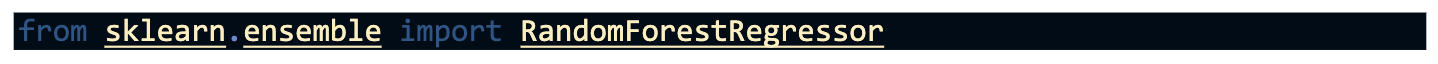

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

**1. Set the number of estimators to be 100, the features to be the square root of available features, and iterate through depths (1-20). Use only 5 folds for cross validation to save some compute resources. Plot the max depth on the x axis and the accuracy on the y axis for training and for the mean cross validation.**

In [18]:
df = pd.read_csv('county_level_election.csv')

print(df.head())

      state  fipscode             county  population  hispanic  minority  \
0  Colorado      8117      Summit County       27239    15.173     4.918   
1  Colorado      8037       Eagle County       53653    30.040     5.169   
2     Idaho     16067    Minidoka County       19226    34.070     5.611   
3  Colorado      8113  San Miguel County        7558    10.154     4.747   
4      Utah     49051     Wasatch County       21600    13.244     4.125   

   female  unemployed  income  nodegree  bachelor  inactivity  obesity  \
0  45.996         2.5   68352       5.4      48.1         8.1     13.1   
1  47.231         3.1   76661      10.1      47.3         9.4     11.8   
2  49.318         3.7   46332      24.1      11.8        18.3     34.2   
3  46.808         3.7   59603       4.7      54.4        12.4     16.7   
4  48.812         3.4   65207       9.5      34.4        13.9     23.0   

   density  cancer  votergap   trump  clinton  
0     46.0    46.2   -27.632  31.530   59.162  
1 

In [19]:
categorical_cols = df.select_dtypes(include = ['object']).columns

df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

X = df_encoded.drop('votergap', axis = 1)
y = df_encoded['votergap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

n_estimators = 100
max_features = int(np.sqrt(X.shape[1]))
depths = list(range(1, 21))

In [20]:
train_scores = []
cv_scores_mean = []

for depth in depths:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, max_features=max_features, random_state=42)
    rf_model.fit(X_train, y_train)

    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)

    cv_score_mean = cross_val_score(rf_model, X_train, y_train, cv=5).mean()
    cv_scores_mean.append(cv_score_mean)

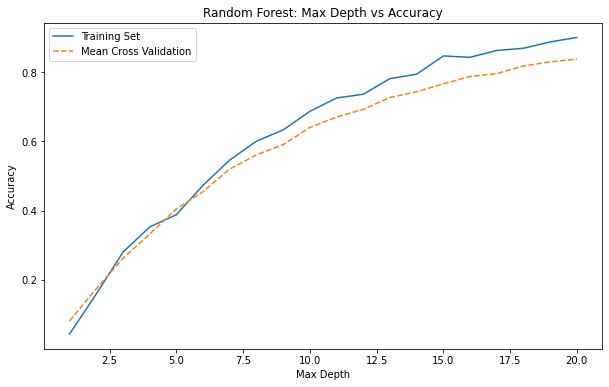

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label = 'Training Set')
plt.plot(depths, cv_scores_mean, label = 'Mean Cross Validation', linestyle = 'dashed')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Max Depth vs Accuracy')
plt.legend()
plt.show()

**2. Based on the plot, how many nodes would you recommend as the max depth?**

I suggest to choose 6 as the max depth.

**3. What is the accuracy (mean cv) at your chosen depth?**

In [22]:
chosen_depth = 6

rf_model_chosen_depth = RandomForestRegressor(n_estimators = n_estimators, max_depth = chosen_depth, max_features = max_features, random_state = 42)

cv_score_mean_chosen_depth = cross_val_score(rf_model_chosen_depth, X_train, y_train, cv = 5).mean()

print(f'Accuracy (mean cv) at chosen depth {chosen_depth}: {cv_score_mean_chosen_depth}')

Accuracy (mean cv) at chosen depth 6: 0.4550335067600807


**4. The cross validation looks different than the lab, why?**

In the lab, a DecisionTreeRegressor was employed, assessing training accuracy and cross-validation scores for different maxdepth values. In contrast, the exercise utilizes a RandomForestRegressor with 100 estimators, averaging scores over 5 folds for each maxdepth. Hyperparameters differ, and cross-validation fold numbers vary between 10 in the lab and 5 in the exercise.

# Section 3: Boosting / XGBoost

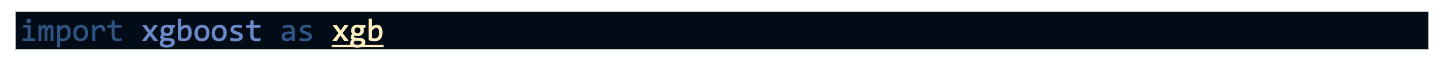

In [23]:
pip install xgboost

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [24]:
import xgboost as xgb

**5. Use the defaults for most parameters. Iterate through depths (1-20). Use only 5 folds for cross validation to save some compute resources. Plot the max depth on the x axis and the accuracy on the y axis for training and for the mean cross validation.**

In [25]:
df = pd.read_csv('county_level_election.csv')
categorical_cols = df.select_dtypes(include = ['object']).columns

df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

X = df_encoded.drop('votergap', axis = 1)
y = df_encoded['votergap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
n_estimators = 100
max_features = int(np.sqrt(X.shape[1]))
depths = list(range(1, 21))

train_scores_rf = []
cv_scores_mean_rf = []

for depth in depths:
    rf_model = RandomForestRegressor(n_estimators = n_estimators, max_depth = depth, max_features = max_features, random_state = 42)
    rf_model.fit(X_train, y_train)

    train_score_rf = rf_model.score(X_train, y_train)
    train_scores_rf.append(train_score_rf)

    cv_score_mean_rf = cross_val_score(rf_model, X_train, y_train, cv = 5).mean()
    cv_scores_mean_rf.append(cv_score_mean_rf)

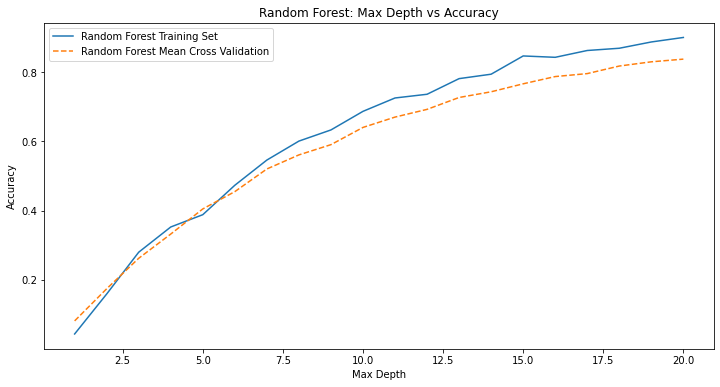

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(depths, train_scores_rf, label = 'Random Forest Training Set')
plt.plot(depths, cv_scores_mean_rf, label = 'Random Forest Mean Cross Validation', linestyle = 'dashed')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Max Depth vs Accuracy')
plt.legend()
plt.show()

In [28]:
depths = list(range(1, 21))

train_scores_xgb = []
cv_scores_mean_xgb = []

for depth in depths:
    xgb_model = xgb.XGBRegressor(max_depth = depth, random_state = 42)
    xgb_model.fit(X_train, y_train)

    train_score_xgb = xgb_model.score(X_train, y_train)
    train_scores_xgb.append(train_score_xgb)

    cv_score_mean_xgb = cross_val_score(xgb_model, X_train, y_train, cv = 5).mean()
    cv_scores_mean_xgb.append(cv_score_mean_xgb)

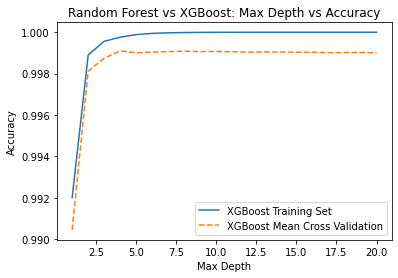

In [29]:
plt.plot(depths, train_scores_xgb, label = 'XGBoost Training Set')
plt.plot(depths, cv_scores_mean_xgb, label = 'XGBoost Mean Cross Validation', linestyle = 'dashed')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest vs XGBoost: Max Depth vs Accuracy')
plt.legend()
plt.show()

**6. Based on the plot, how many nodes would you recommend as the max depth?**

Based on the plot, I suggest to choose 4 as the max depth.

**7. What is the accuracy (mean cv) at your chosen depth?**

In [30]:
chosen_depth = 4
accuracy_at_chosen_depth = cv_scores_mean_xgb[chosen_depth - 1]

print(f"Accuracy (mean cv) at chosen depth ({chosen_depth}): {accuracy_at_chosen_depth}")

Accuracy (mean cv) at chosen depth (4): 0.9991031465327612


**8. The cross validation looks different than random forest, why?**

Divergent cross-validation outcomes between Random Forest and XGBoost may stem from their distinct working mechanisms. Random Forest relies on independent decision trees, while XGBoost employs boosting, building trees sequentially to correct errors. XGBoost integrates regularization to prevent overfitting, weighted updates for focus, outlier-handling mechanisms, and gradient-based optimization, potentially yielding varied cross-validation patterns.